In [1]:
# Answer the following questions:

# 1. What was the change in the price of the stock over time?
# 2. What was the daily return of the stock on average?
# 3. What was the moving average of the various stocks
# 4. What was the correlation between different stocks' closing prices?
# 4. What was the correlation between different stocks' daily returns?
# 5. How much do we put at risk by investing in a particular stock?
# 6. How can we attemtp to predict future stock behavior?

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
import pandas_datareader.data as web

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [8]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-14,625.700012,625.859985,619.429993,623.239990,1702300,623.239990
2015-09-15,626.700012,638.700012,623.780029,635.140015,2084400,635.140015
2015-09-16,635.469971,637.950012,632.320007,635.979980,1286500,635.979980
2015-09-17,637.789978,650.900024,635.020020,642.900024,2274700,642.900024
2015-09-18,636.789978,640.000000,627.020020,629.250000,5133400,629.250000


In [9]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,104.860876,105.790359,103.905657,104.869362,4.149513e+07,103.641927
std,8.143610,8.169202,8.082935,8.135907,1.672207e+07,7.709457
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.270000,98.200001,96.505001,97.134998,2.942635e+07,96.253576
50%,105.519997,106.309998,104.879997,105.790001,3.735620e+07,104.593141
75%,110.800003,111.879998,109.454998,110.779999,4.910605e+07,109.241917
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-09-14 to 2016-09-09
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


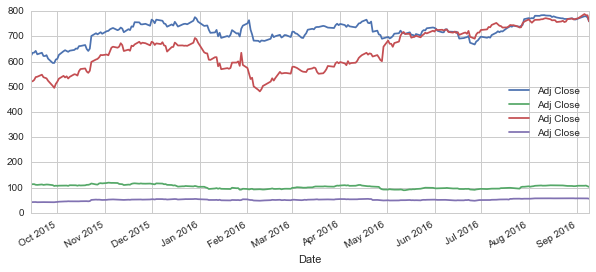

In [11]:
for stock in [GOOG,AAPL,AMZN,MSFT]:
    chart = stock['Adj Close']
    chart.plot(legend = True, figsize=(10,4))


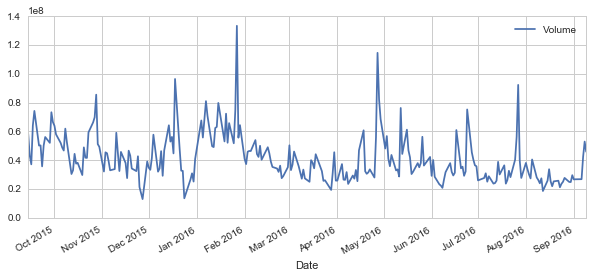

In [12]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

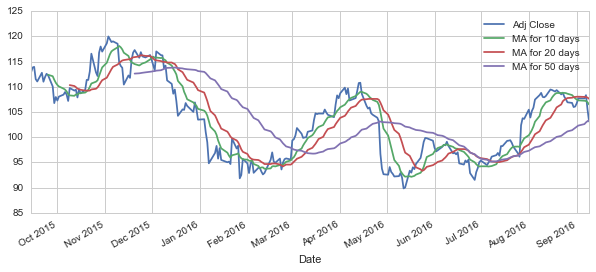

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

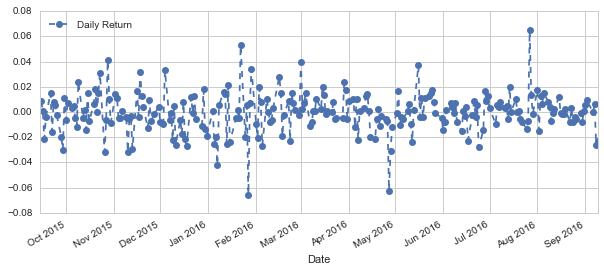

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4),legend = True, linestyle='--', marker='o')

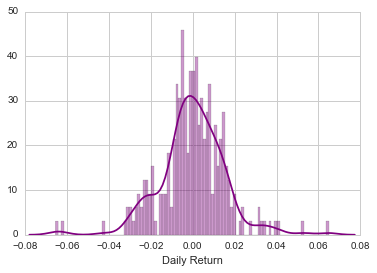

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color = 'purple')

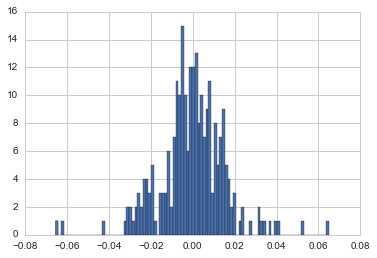

In [17]:
AAPL['Daily Return'].hist(bins=100)

In [18]:
closing_df = web.DataReader(tech_list, 'yahoo',start,end)['Adj Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-14,112.896168,521.380005,623.239990,41.891153
2015-09-15,113.845864,522.369995,635.140015,42.806060
2015-09-16,113.973148,527.390015,635.979980,43.117518
2015-09-17,111.535266,538.869995,642.900024,43.068854
2015-09-18,111.075104,540.260010,629.250000,42.319407


In [20]:
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-14,NaN,NaN,NaN,NaN
2015-09-15,0.008412,0.001899,0.019094,0.021840
2015-09-16,0.001118,0.009610,0.001322,0.007276
2015-09-17,-0.021390,0.021768,0.010881,-0.001129
2015-09-18,-0.004126,0.002579,-0.021232,-0.017401


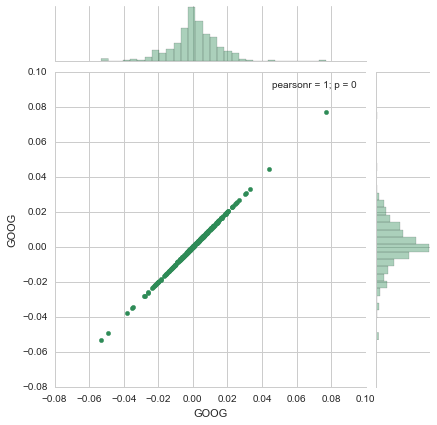

In [22]:
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter', color = 'seagreen')

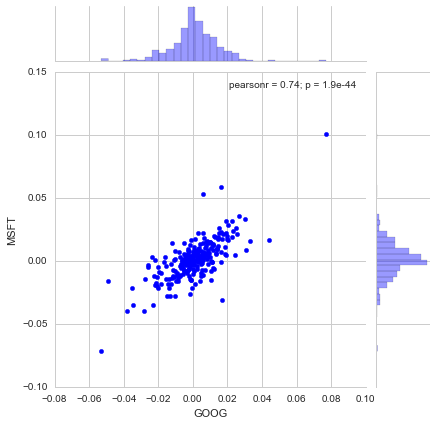

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='blue')

In [24]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-14,NaN,NaN,NaN,NaN
2015-09-15,0.008412,0.001899,0.019094,0.021840
2015-09-16,0.001118,0.009610,0.001322,0.007276
2015-09-17,-0.021390,0.021768,0.010881,-0.001129
2015-09-18,-0.004126,0.002579,-0.021232,-0.017401


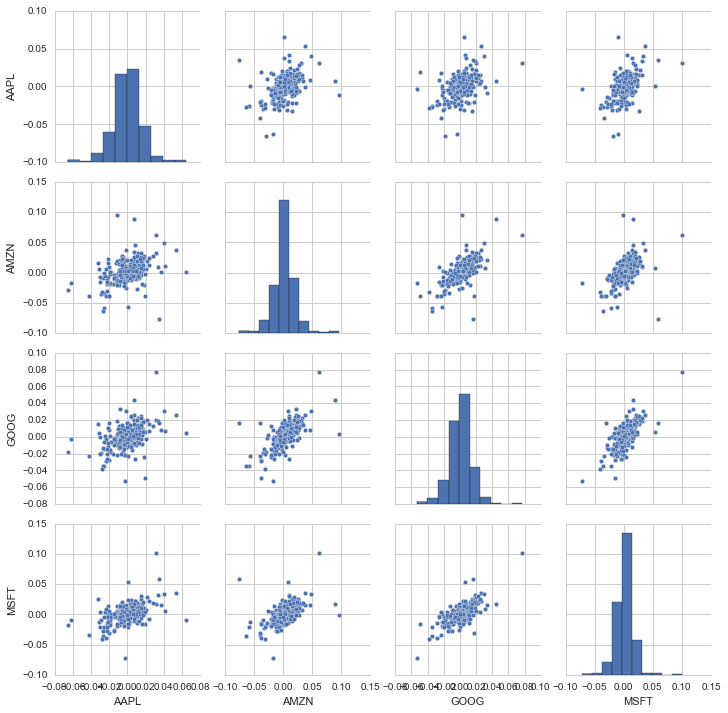

In [25]:
sns.pairplot(tech_rets.dropna())

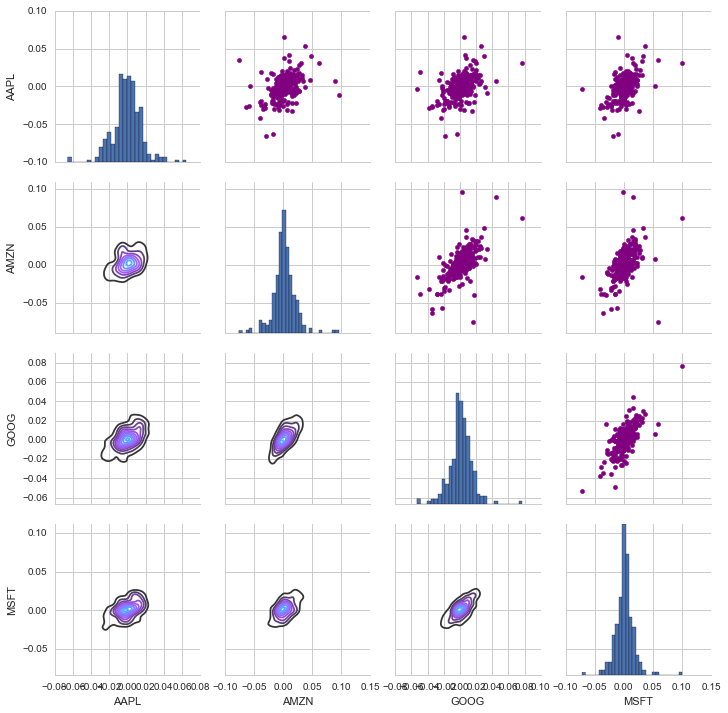

In [26]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

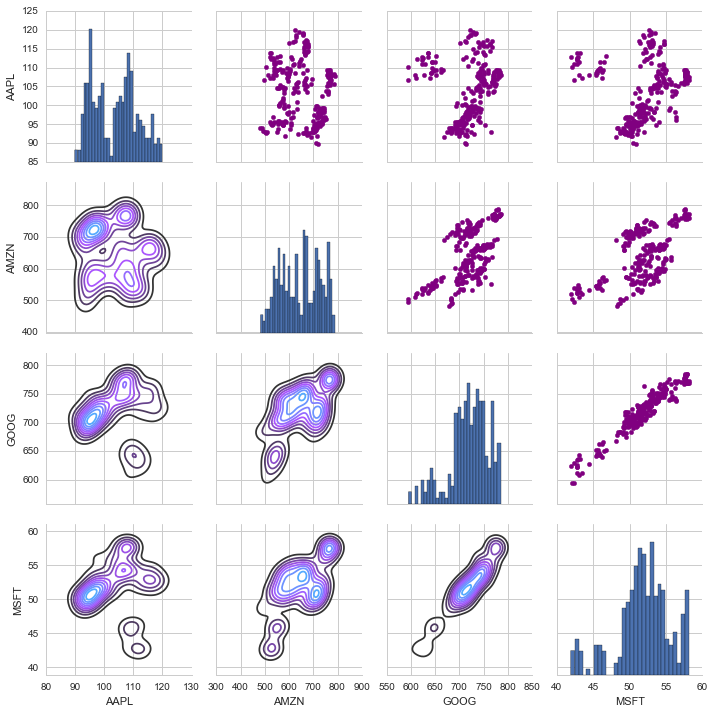

In [27]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

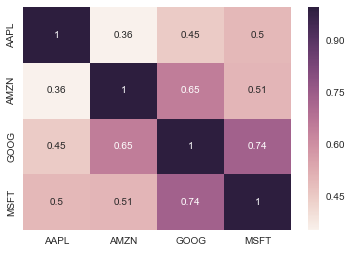

In [28]:
sns.heatmap(tech_rets.dropna().corr(), annot = True)

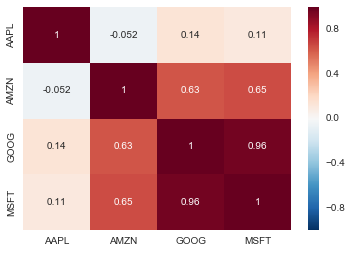

In [29]:
sns.heatmap(closing_df.corr(), annot=True)

In [30]:
rets = tech_rets.dropna()

In [32]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-15,0.008412,0.001899,0.019094,0.021840
2015-09-16,0.001118,0.009610,0.001322,0.007276
2015-09-17,-0.021390,0.021768,0.010881,-0.001129
2015-09-18,-0.004126,0.002579,-0.021232,-0.017401
2015-09-21,0.015513,0.015048,0.009837,0.014489


In [33]:
area = np.pi*20

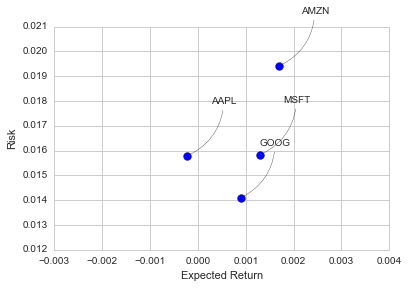

In [37]:
plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.xlim([-0.003,0.004])
plt.ylim([0.012, 0.021])

#matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x,y), xytext = (50,50), 
        textcoords = 'offset points', ha = 'right', va = 'bottom', 
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

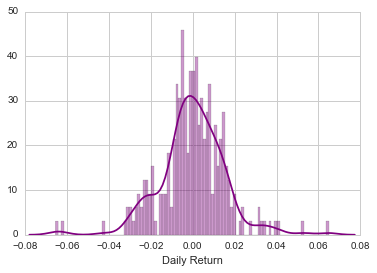

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color = 'purple')

In [39]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-15,0.008412,0.001899,0.019094,0.021840
2015-09-16,0.001118,0.009610,0.001322,0.007276
2015-09-17,-0.021390,0.021768,0.010881,-0.001129
2015-09-18,-0.004126,0.002579,-0.021232,-0.017401
2015-09-21,0.015513,0.015048,0.009837,0.014489


In [40]:
rets['AAPL'].quantile(0.05)

-0.025725597373474567

In [41]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    

In [43]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-14,625.700012,625.859985,619.429993,623.239990,1702300,623.239990
2015-09-15,626.700012,638.700012,623.780029,635.140015,2084400,635.140015
2015-09-16,635.469971,637.950012,632.320007,635.979980,1286500,635.979980
2015-09-17,637.789978,650.900024,635.020020,642.900024,2274700,642.900024
2015-09-18,636.789978,640.000000,627.020020,629.250000,5133400,629.250000


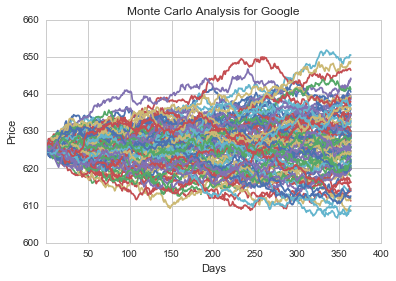

In [46]:
start_price = 625.70

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [47]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

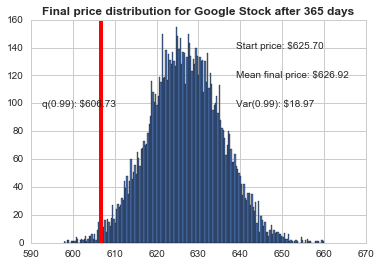

In [55]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, s="Mean final price: $%.2f" %simulation.mean())

plt.figtext(0.6,0.6, s="Var(0.99): $%.2f" %(start_price - q))

plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" %q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');